## Applied Signal and Image Processing

(Subhashish Nabajja, CS24010)


**Aim**: Write program to implement point/pixel intensity transformations
1. Log and Power-law transformations
2. Contrast adjustments
3. Histogram equalization
4. Thresholding, and halftoning operations

# Image Processing Operations

## 1. Log and Power-law Transformations
- **Log Transformation**: This transformation is used to enhance the darker regions of an image. It applies a logarithmic function to pixel values, which compresses the higher intensities and stretches the lower intensities. It is often used to improve the visibility of details in the darker regions of an image.
  - **Formula**: \( S = c \cdot \log(1 + I) \), where \( I \) is the original image intensity, \( S \) is the transformed intensity, and \( c \) is a scale constant.
  
- **Power-law (Gamma) Transformation**: This operation adjusts the contrast of an image by applying a power-law function to each pixel. The transformation can lighten or darken the image depending on the value of gamma (\( \gamma \)).
  - **Formula**: \( S = c \cdot I^{\gamma} \), where \( \gamma \) is the gamma value and \( c \) is a scale constant. 
  - If \( \gamma > 1 \), the image appears brighter, and if \( \gamma < 1 \), the image appears darker.

## 2. Contrast Adjustments
- **Contrast Adjustment**: This operation changes the contrast of an image by scaling the pixel intensities. A higher contrast enhances the difference between the light and dark areas, while a lower contrast makes the image look flatter.
  - **Formula**: \( S = \alpha \cdot I + \beta \), where \( \alpha \) controls the contrast (scaling factor) and \( \beta \) adjusts the brightness (offset).

## 3. Histogram Equalization
- **Histogram Equalization**: This technique enhances the contrast in an image by adjusting the intensity distribution of the image to span the full range of pixel values. It redistributes the intensity levels to use the available range more efficiently, making the image appear more balanced and clearer.
  - The algorithm works by computing the cumulative distribution function (CDF) of pixel intensities and then transforming the intensities based on the CDF.

## 4. Thresholding and Halftoning Operations
- **Thresholding**: This technique converts an image into a binary format by setting all pixels above a certain threshold to white (255) and those below the threshold to black (0). It is commonly used for segmenting objects from the background.
  - **Formula**: \( S = 255 \) if \( I > threshold \), else \( S = 0 \), where \( S \) is the transformed pixel value.
  
- **Halftoning**: This operation simulates continuous tones in an image by converting it into a binary format. The technique involves creating a dot pattern that approximates the original image's tonal variations. It is often used in printing, where continuous shading is not possible.
  - Halftoning works by mapping pixel intensities to either black or white based on a specific criterion (e.g., pixel intensity threshold).

---

These operations are fundamental image processing techniques that can enhance or modify images in various ways, making them suitable for a wide range of applications such as image enhancement, object detection, and visual effects.


C:\Users\subha\AppData\Local\Temp\ipykernel_19924\37442643.py:14: RuntimeWarning: overflow encountered in scalar add
  c = 255 / np.log(1 + np.max(image))  # Scale constant
C:\Users\subha\AppData\Local\Temp\ipykernel_19924\37442643.py:14: RuntimeWarning: divide by zero encountered in log
  c = 255 / np.log(1 + np.max(image))  # Scale constant
C:\Users\subha\AppData\Local\Temp\ipykernel_19924\37442643.py:15: RuntimeWarning: divide by zero encountered in log
  log_image = c * np.log(1 + image)
C:\Users\subha\AppData\Local\Temp\ipykernel_19924\37442643.py:15: RuntimeWarning: invalid value encountered in multiply
  log_image = c * np.log(1 + image)
C:\Users\subha\AppData\Local\Temp\ipykernel_19924\37442643.py:16: RuntimeWarning: invalid value encountered in cast
  return np.uint8(log_image)


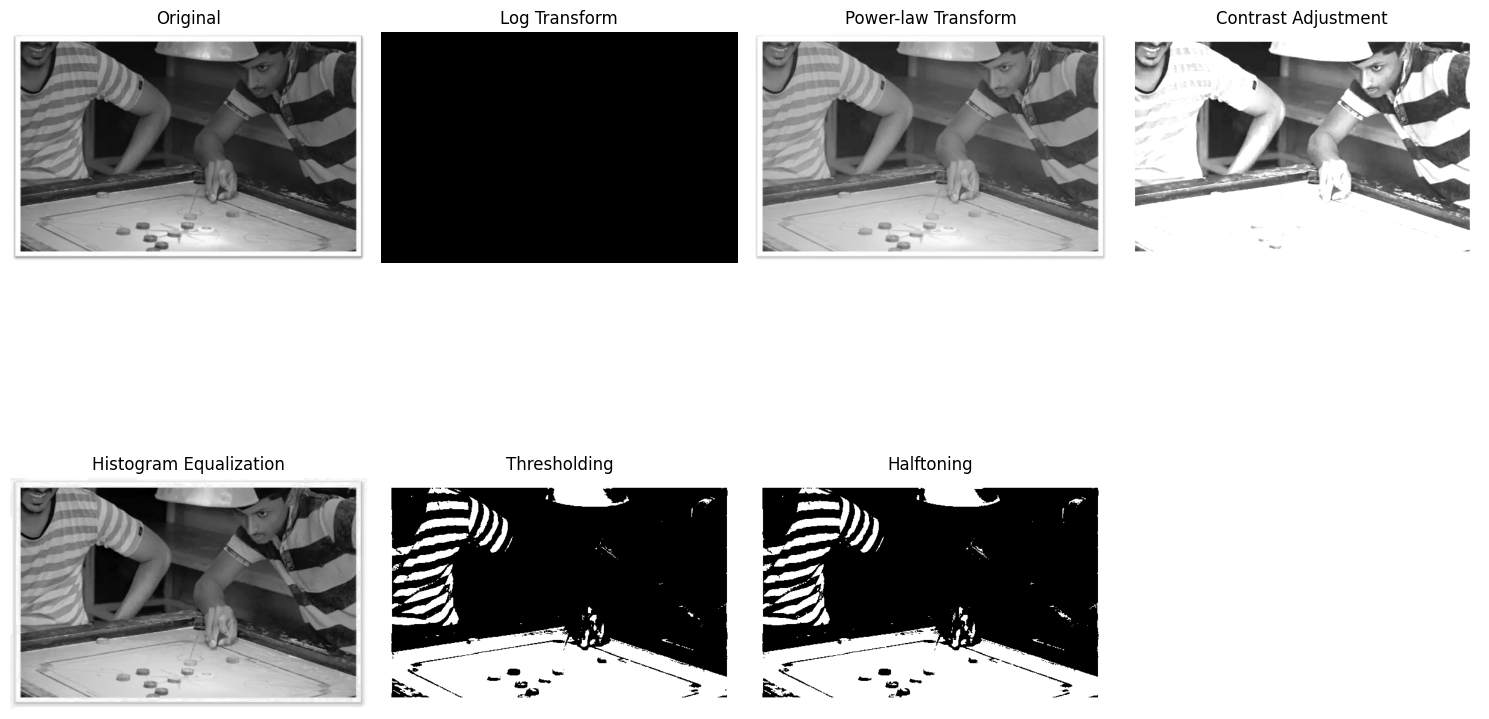

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an example grayscale image
def load_image(path):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Image not found at '{path}'. Please provide a valid path.")
    return image

# 1. Log Transformation
def log_transform(image):
    c = 255 / np.log(1 + np.max(image))  # Scale constant
    log_image = c * np.log(1 + image)
    return np.uint8(log_image)

# 2. Power-Law (Gamma) Transformation
def power_law_transform(image, gamma=1.0):
    c = 255 / (np.max(image) ** gamma)
    power_image = c * (image ** gamma)
    return np.uint8(power_image)

# 3. Contrast Adjustment
def contrast_adjustment(image, alpha=1.5, beta=0):
    contrast_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return contrast_image

# 4. Histogram Equalization
def histogram_equalization(image):
    equalized_image = cv2.equalizeHist(image)
    return equalized_image

# 5. Thresholding
def thresholding(image, threshold=128):
    _, binary_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    return binary_image

# 6. Halftoning
def halftoning(image):
    halftone_image = np.where(image > 127, 255, 0).astype(np.uint8)
    return halftone_image

# Display images
def display_images(images, titles):
    plt.figure(figsize=(15, 10))
    for i, (image, title) in enumerate(zip(images, titles)):
        rows, cols = 2, 4  # Adjust grid size to fit 7 images
        plt.subplot(rows, cols, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Load your image here
    image_path = './assets/image-1.jpeg'  # Replace with the path to your image
    image = load_image(image_path)

    # Apply transformations
    log_image = log_transform(image)
    power_image = power_law_transform(image, gamma=0.5)
    contrast_image = contrast_adjustment(image, alpha=2.0, beta=50)
    equalized_image = histogram_equalization(image)
    binary_image = thresholding(image, threshold=128)
    halftone_image = halftoning(image)

    # Display results
    images = [image, log_image, power_image, contrast_image, equalized_image, binary_image, halftone_image]
    titles = ["Original", "Log Transform", "Power-law Transform", 
              "Contrast Adjustment", "Histogram Equalization", 
              "Thresholding", "Halftoning"]
    display_images(images, titles)